****INTRODUCTION****

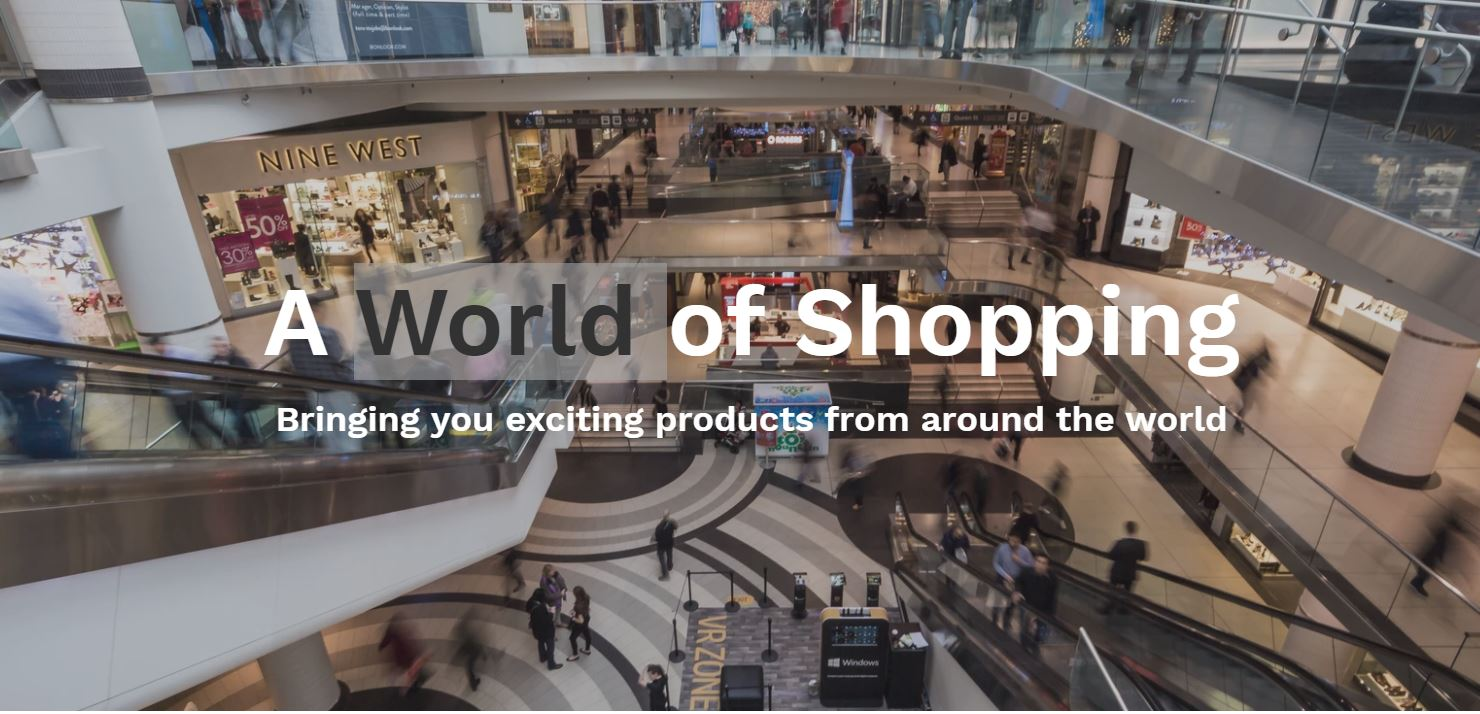

Online shopping has grown in popularity over the years, mainly because people find it convenient and easy to bargain shop from the comfort of their home or office. 

One of the most enticing factor about online shopping, particularly during a holiday season, is it alleviates the need to wait in long lines or search from store to store for a particular item.

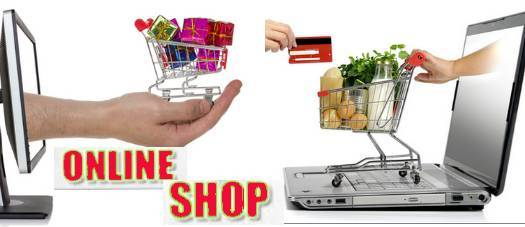

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/superstore/US Superstore data.xls


Lets look at the data of a superstore in US and get some insights from it.

****IMPORTING LIBRARIES****


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

****READING THE DATA****

Lets us read the data and take a look at first few rows.

In [3]:
df=pd.read_excel('/kaggle/input/superstore/US Superstore data.xls')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**EXPLORATORY DATA ANALYSIS**

In [4]:
#row,column count of data
df.shape

(9994, 21)

In [5]:
#column names of table
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
#check data type of columns/attributes
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Lets check if there are any missing values in the data

In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

There are no missing values. Hence we can go exploratory analysis part directly.

**WAIT**.... Check for unnecessary columns and drop them if not required

'Row ID' column is nothing but the serial number so we can drop this column.

In [8]:
#Dropping  Row ID column and assigning to df
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

Clearly the data is for US country only, so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [10]:
#dropping Country column
df=df.drop('Country',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


We can analyse the data further in 3 different ways

> * PRODUCT LEVEL ANALYSIS
> * CUSTOMER LEVEL ANALYSIS
> * ORDER LEVEL ANALYSIS

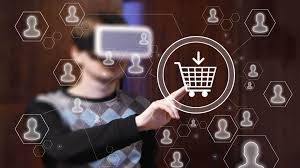

Lets look at the product categories available to shop for customers

In [11]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [12]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [13]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [14]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

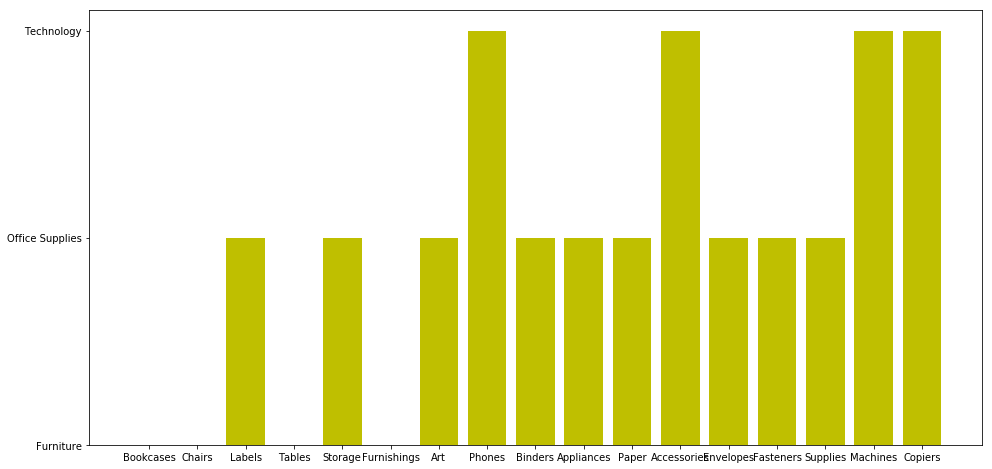

In [15]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

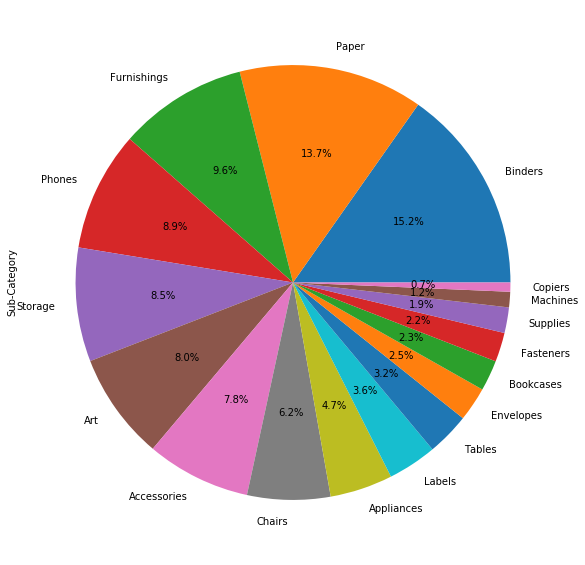

In [16]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

 The store has wide variety of Office Supplies especially in Binders and Paper department.

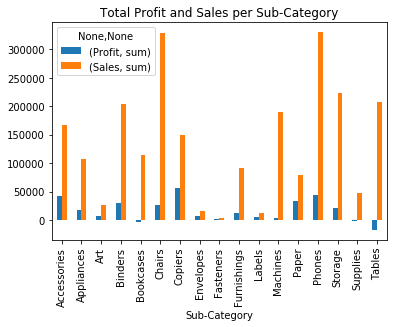

In [17]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

In [18]:
#number of products available in store
df['Product Name'].nunique()

1850

In [19]:
df['Product Name'].value_counts()

Staple envelope                                                              48
Easy-staple paper                                                            46
Staples                                                                      46
Avery Non-Stick Binders                                                      20
Staples in misc. colors                                                      19
                                                                             ..
Xiaomi Mi3                                                                    1
Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order     1
Pyle PRT45 Retro Home Telephone                                               1
Vtech AT&T CL2940 Corded Speakerphone, Black                                  1
Linden 12" Wall Clock With Oak Frame                                          1
Name: Product Name, Length: 1850, dtype: int64

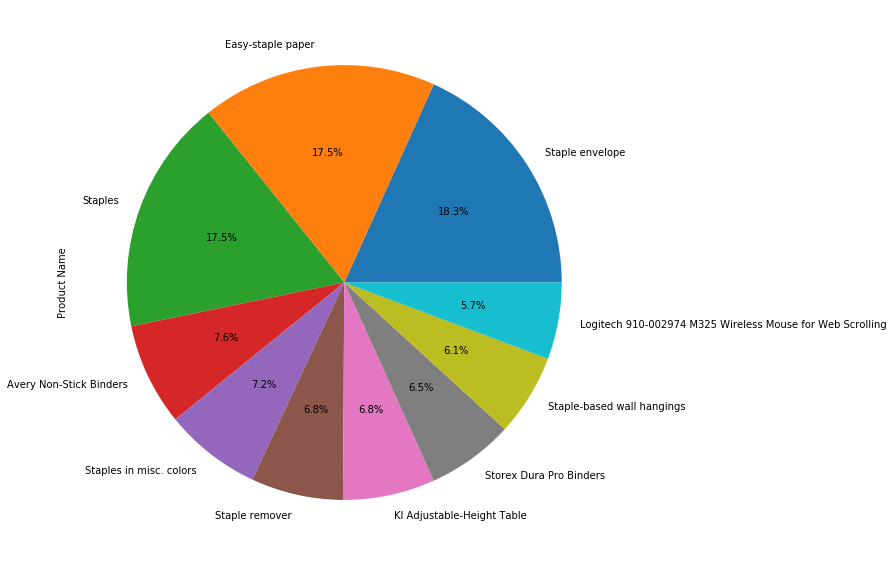

In [20]:
#Distribution of Top 10 Products
plt.figure(figsize=(12,10))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

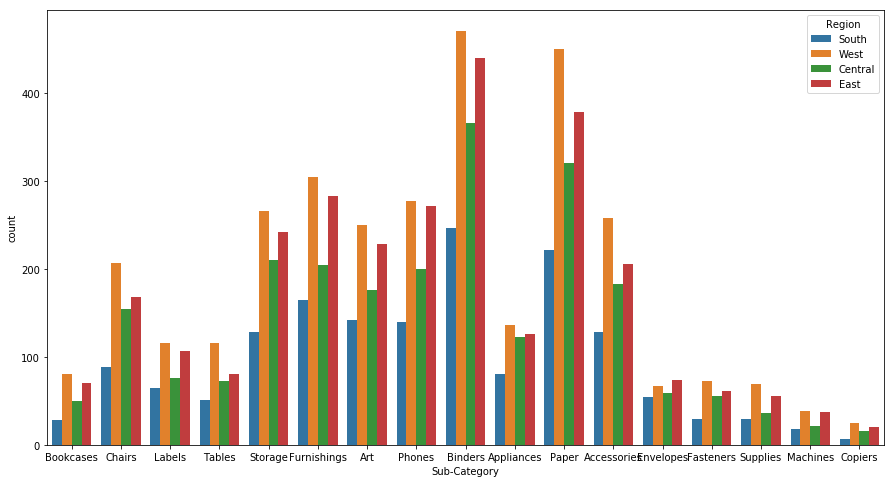

In [21]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People residing in Western part of US tend to order more from superstore.

To understand the data better. Lets create some new columns like Cost,Profit%

In [22]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [23]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [24]:
#Profit Percentage of first 5 product names
df.iloc[[0,1,2,3,4],[14,20]]

,Product Name,Profit %
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


In [25]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,52.4900,100.000000
4611,CA-2016-109407,2016-01-24,2016-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,Gulfport,Mississippi,39503,...,OFF-BI-10000285,Office Supplies,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.360,4,0.0,15.6800,15.6800,100.000000
3984,CA-2016-135265,2016-07-07,2016-07-09,Second Class,CC-12370,Christopher Conant,Consumer,Los Angeles,California,90045,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,48.940,1,0.0,24.4700,24.4700,100.000000
4651,CA-2017-150987,2017-04-08,2017-04-12,Standard Class,AH-10120,Adrian Hane,Home Office,San Francisco,California,94110,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,195.760,4,0.0,97.8800,97.8800,100.000000
6600,CA-2014-154095,2014-12-02,2014-12-07,Standard Class,ON-18715,Odella Nelson,Corporate,Clinton,Maryland,20735,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,146.820,3,0.0,73.4100,73.4100,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,...,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,...,OFF-AP-10004136,Office Supplies,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,92.2050,-73.333333
676,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,Tyler,Texas,75701,...,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,10.0800,-73.333333
261,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,77506,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,6.0900,-73.333333


Retailers selling Phone,Binders,Papers have got 100% Profit in their Business.

**LETS LOOK AT THE DATA WRT TO CUSTOMER LEVEL**

In [26]:
df['Customer ID'].nunique()

793

In [27]:
#Top 10 customers who order frequently
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

William Brown          37
Paul Prost             34
Matt Abelman           34
John Lee               34
Chloris Kastensmidt    32
Seth Vernon            32
Edward Hooks           32
Jonathan Doherty       32
Emily Phan             31
Arthur Prichep         31
Name: Customer Name, dtype: int64

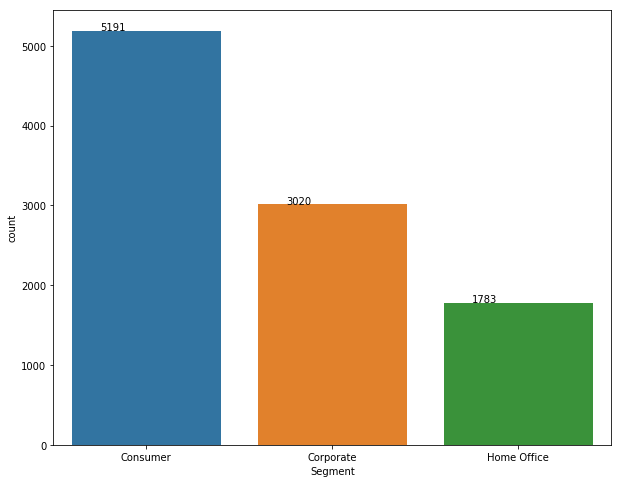

In [28]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

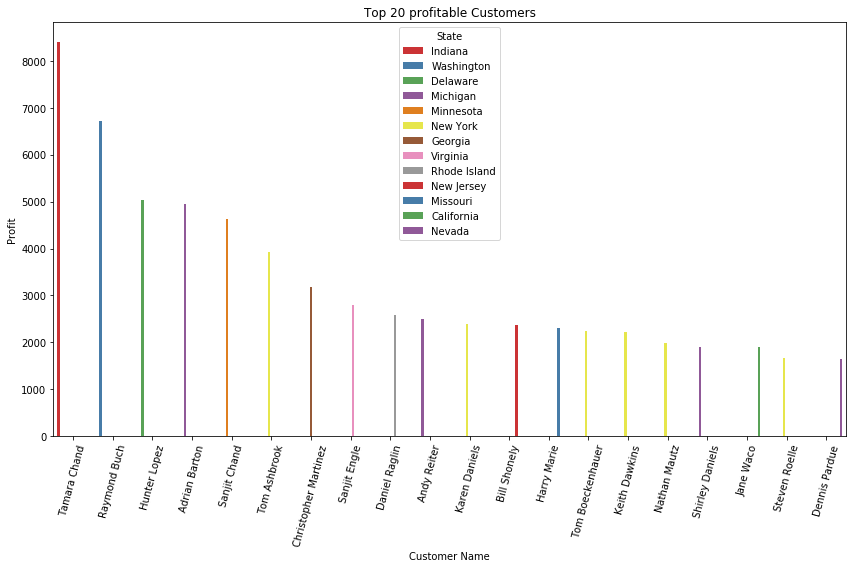

In [29]:
#Top 20 Customers who benefitted the store
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

 We see that majority of the Profitable Customers are from New York and Michigan State.

Lets do some do some Analysis with Order details of the data

In [30]:
#number of unique orders
df['Order ID'].nunique()

5009

In [31]:
#Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Shipment Duration, Length: 9994, dtype: int64

In [32]:
df.iloc[:,[0,3,21]]

,Order ID,Ship Mode,Shipment Duration
0,CA-2016-152156,Second Class,3
1,CA-2016-152156,Second Class,3
2,CA-2016-138688,Second Class,4
3,US-2015-108966,Standard Class,7
4,US-2015-108966,Standard Class,7
...,...,...,...
9989,CA-2014-110422,Second Class,2
9990,CA-2017-121258,Standard Class,5
9991,CA-2017-121258,Standard Class,5
9992,CA-2017-121258,Standard Class,5


Lets find out some more details about each Customer like total products purchased,Products they purchase,First Purchase Date,Last Purchase Date,Location from where the Customer placed an order.

In [33]:
#creating function and appending customer and order info to it.
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [34]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2014-03-31,2017-06-29,"[Belkin 325VA UPS Surge Protector, 6', Avery B...","[Minneapolis, San Francisco, Round Rock, New Y..."
AA-10375,15,1056.390,52.349415,2014-04-21,2017-12-11,"[Sterilite Officeware Hinged File Box, Colored...","[Mesa, Omaha, Los Angeles, Salem, Atlanta, Ran..."
AA-10480,12,1790.512,55.580242,2014-05-04,2017-04-15,"[Xerox 1967, DAX Wood Document Frame, Strathmo...","[Concord, Middletown, Springfield, Detroit]"
AA-10645,18,5086.935,42.364755,2014-06-22,2017-11-05,"[Padded Folding Chairs, Black, 4/Carton, Panas...","[Chester, San Francisco, Georgetown, San Diego..."
AB-10015,6,886.156,15.186975,2014-02-18,2016-11-10,"[Global Push Button Manager's Chair, Indigo, N...","[Seattle, Arlington, Oklahoma City]"
...,...,...,...,...,...,...,...
XP-21865,28,2374.658,53.799227,2014-01-20,2017-11-17,[Imation USB 2.0 Swivel Flash Drive USB flash ...,"[San Diego, Everett, Chicago, Los Angeles, Pas..."
YC-21895,8,5454.350,42.235317,2014-11-17,2017-12-26,[Hewlett Packard 610 Color Digital Copier / Pr...,"[San Francisco, Los Angeles, Newark, Dallas, F..."
YS-21880,12,6720.444,37.278442,2015-01-12,2017-12-21,"[4009 Highlighters by Sanford, Letter Size Car...","[Burlington, Oakland, Newark, Seattle, Columbu..."


In [35]:
#extracting the year of order
df['order year']=df['Order Date'].dt.year
df['order year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order year, dtype: int64

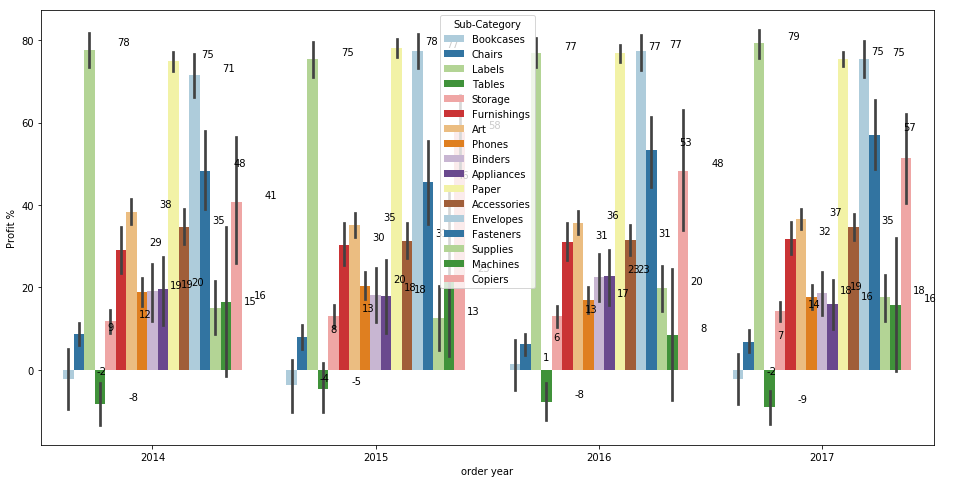

In [36]:
#Calculating Profit gained in each Category
fig=plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.barplot('order year','Profit %',hue='Sub-Category',palette='Paired',data=df)
for o in ax.patches:
    ax.annotate('{:.0f}'.format(o.get_height()), (o.get_x()+0.15, o.get_height()+1))
plt.show()

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

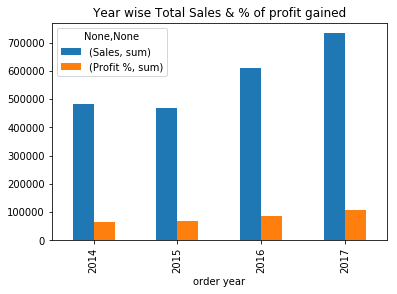

In [37]:
#Sales per year
df.groupby('order year')['Sales','Profit %'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

Sales of the store has increased every year resulting in high profit margin by the end of 2017.